In [1]:
import urllib.request
import ssl
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme(style="whitegrid")
palette = sns.color_palette("viridis", as_cmap=True)

In [ ]:
url = (
    'https://open.canada.ca/data/en/api/3/action/datastore_search?'
    'resource_id=d16e10ea-77bf-4db8-bdb5-adc709e6cada&limit=100000'
)

context = ssl._create_unverified_context()
response = urllib.request.urlopen(url, context=context)
data = json.loads(response.read())

fields = data['result']['fields']
column_order = [field['id'] for field in fields]

records = data['result']['records']
df = pd.DataFrame(records)

df = df[column_order]

pd.set_option('display.max_columns', None) 
if '_id' in df.columns:
    df.drop(columns=['_id'], inplace=True)

In [3]:
df

,NOC_CNP,NOC_Title_eng,NOC_Title_fra,prov,ER_Code_Code_RE,ER_Name,Nom_RE,Low_Wage_Salaire_Minium,Median_Wage_Salaire_Median,High_Wage_Salaire_Maximal,Average_Wage_Salaire_Moyen,Quartile1_Wage_Salaire_Quartile1,Quartile3_Wage_Salaire_Quartile3,Data_Source_E,Data_Source_F,Reference_Period,Revision_Date_Date_revision,Annual_Wage_Flag_Salaire_annuel,Wage_Comment_E,Wage_Comment_F,Non_WageBen_pct
0,NOC_00010,Legislators,Membres des corps législatifs,NAT,ER00,Canada,Canada,32360,84000,184000,97600,54400,132000,2021 Census,Recensement 2021,2021,2024-12-03,1,Wages for this occupation are presented at an ...,Pour cette profession sont présentés au taux a...,62.8
1,NOC_00010,Legislators,Membres des corps législatifs,NL,ER10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,None,99000,None,90000,None,None,2021 Census,Recensement 2021,2021,2024-12-03,1,Wages for this occupation are presented at an ...,Pour cette profession sont présentés au taux a...,None
2,NOC_00010,Legislators,Membres des corps législatifs,NL,ER1010,Avalon Peninsula,Avalon Peninsula,None,None,None,None,None,None,NA,NA,NA,2024-12-03,0,"Due to data limitations, the wage for this occ...","En raison des limites associées aux données, l...",None
3,NOC_00010,Legislators,Membres des corps législatifs,NL,ER1020,South Coast--Burin Peninsula,Côte-sud--Burin Peninsula,None,None,None,None,None,None,NA,NA,NA,2024-12-03,0,"Due to data limitations, the wage for this occ...","En raison des limites associées aux données, l...",None
4,NOC_00010,Legislators,Membres des corps législatifs,NL,ER1030,West Coast--Northern Peninsula--Labrador,Côte-ouest--Northern Peninsula--Labrador,None,None,None,None,None,None,NA,NA,NA,2024-12-03,0,"Due to data limitations, the wage for this occ...","En raison des limites associées aux données, l...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,NOC_72422,Electrical mechanics,Électromécaniciens/électromécaniciennes,NL,ER1020,South Coast--Burin Peninsula,Côte-sud--Burin Peninsula,None,None,None,None,None,None,NA,NA,NA,2024-12-03,0,"Due to data limitations, the wage for this occ...","En raison des limites associées aux données, l...",None
31996,NOC_72422,Electrical mechanics,Électromécaniciens/électromécaniciennes,NL,ER1030,West Coast--Northern Peninsula--Labrador,Côte-ouest--Northern Peninsula--Labrador,None,None,None,None,None,None,NA,NA,NA,2024-12-03,0,"Due to data limitations, the wage for this occ...","En raison des limites associées aux données, l...",None
31997,NOC_72422,Electrical mechanics,Électromécaniciens/électromécaniciennes,NL,ER1040,Notre Dame--Central Bonavista Bay,Notre Dame--Central Bonavista Bay,None,None,None,None,None,None,NA,NA,NA,2024-12-03,0,"Due to data limitations, the wage for this occ...","En raison des limites associées aux données, l...",None
31998,NOC_72422,Electrical mechanics,Électromécaniciens/électromécaniciennes,PEI,ER1110,Prince Edward Island,Île-du-Prince-Édouard,None,None,None,None,None,None,NA,NA,NA,2024-12-03,0,"Due to data limitations, the wage for this occ...","En raison des limites associées aux données, l...",None


In [4]:
columns_to_drop = [
    'Quartile1_Wage_Salaire_Quartile1',
    'Quartile3_Wage_Salaire_Quartile3',
    'Data_Source_E',
    'Data_Source_F',
    'Reference_Period',
    'Revision_Date_Date_revision',
    'Annual_Wage_Flag_Salaire_annuel',
    'Wage_Comment_E',
    'Wage_Comment_F',
    'Non_WageBen_pct',
    'ER_Code_Code_RE',
    'NOC_Title_fra',
    'Nom_RE'
]
df.drop(columns=columns_to_drop, inplace=True)

In [5]:
df.drop(columns='NOC_CNP', inplace=True)

In [6]:
df

,NOC_Title_eng,prov,ER_Name,Low_Wage_Salaire_Minium,Median_Wage_Salaire_Median,High_Wage_Salaire_Maximal,Average_Wage_Salaire_Moyen
0,Legislators,NAT,Canada,32360,84000,184000,97600
1,Legislators,NL,Newfoundland and Labrador,None,99000,None,90000
2,Legislators,NL,Avalon Peninsula,None,None,None,None
3,Legislators,NL,South Coast--Burin Peninsula,None,None,None,None
4,Legislators,NL,West Coast--Northern Peninsula--Labrador,None,None,None,None
...,...,...,...,...,...,...,...
31995,Electrical mechanics,NL,South Coast--Burin Peninsula,None,None,None,None
31996,Electrical mechanics,NL,West Coast--Northern Peninsula--Labrador,None,None,None,None
31997,Electrical mechanics,NL,Notre Dame--Central Bonavista Bay,None,None,None,None
31998,Electrical mechanics,PEI,Prince Edward Island,None,None,None,None


In [7]:
has_missing =  df.notna()
has_missing

,NOC_Title_eng,prov,ER_Name,Low_Wage_Salaire_Minium,Median_Wage_Salaire_Median,High_Wage_Salaire_Maximal,Average_Wage_Salaire_Moyen
0,True,True,True,True,True,True,True
1,True,True,True,False,True,False,True
2,True,True,True,False,False,False,False
3,True,True,True,False,False,False,False
4,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...
31995,True,True,True,False,False,False,False
31996,True,True,True,False,False,False,False
31997,True,True,True,False,False,False,False
31998,True,True,True,False,False,False,False


In [8]:
df_clean = df.dropna()

In [9]:
df_clean

,NOC_Title_eng,prov,ER_Name,Low_Wage_Salaire_Minium,Median_Wage_Salaire_Median,High_Wage_Salaire_Maximal,Average_Wage_Salaire_Moyen
0,Legislators,NAT,Canada,32360,84000,184000,97600
7,Legislators,NS,Nova Scotia,32360,94000,158000,94000
13,Legislators,NB,New Brunswick,34800,68000,150000,78000
19,Legislators,QC,Quebec,41200,96000,184000,102800
26,Legislators,QC,Montérégie,38000,97000,200000,112000
...,...,...,...,...,...,...,...
31977,Appliance servicers and repairers,AB,Edmonton,19,25,35.35,26.29
31980,Appliance servicers and repairers,BC,British Columbia,18.2,26,37.3,27.24
31981,Appliance servicers and repairers,BC,Vancouver Island and Coast,18.2,26,37.3,27.24
31982,Appliance servicers and repairers,BC,Lower Mainland,18,26.25,36.5,27.1


In [10]:
df_clean = df_clean.dropna()

In [11]:

target_roles = [
            'Data scientists',
            'Business development officers and market researchers and analysts',
            'Business systems specialists',
            'Computer systems developers and programmers',
            'Software developers and programmers',
            'Software engineers and designers',
            'Web developers and programmers',
            'User support technicians',
            'Computer network technicians',
            'Database analysts and data administrators',
            'Information systems analysts and consultants'
]
    

df_filtered = df_clean[df_clean['NOC_Title_eng'].isin(target_roles)].copy()

In [12]:
df_filtered

,NOC_Title_eng,prov,ER_Name,Low_Wage_Salaire_Minium,Median_Wage_Salaire_Median,High_Wage_Salaire_Maximal,Average_Wage_Salaire_Moyen
7138,Data scientists,NAT,Canada,29.74,44.1,64.9,47.56
7145,Data scientists,NS,Nova Scotia,22.29,40.88,52,39.12
7157,Data scientists,QC,Quebec,31.73,45.45,96,50.9
7160,Data scientists,QC,Capitale-Nationale,31.73,45.45,96,50.9
7164,Data scientists,QC,Montérégie,31.73,45.45,96,50.9
...,...,...,...,...,...,...,...
17360,Business development officers and market resea...,BC,British Columbia,17.4,44.18,66.67,41.02
17361,Business development officers and market resea...,BC,Vancouver Island and Coast,17.4,44.18,66.67,41.02
17362,Business development officers and market resea...,BC,Lower Mainland,17.4,44.18,66.67,41.02
17363,Business development officers and market resea...,BC,Thompson--Okanagan,17.4,44.18,66.67,41.02


In [13]:
df_new = df_filtered.reset_index(drop=True)

In [14]:
df_new

,NOC_Title_eng,prov,ER_Name,Low_Wage_Salaire_Minium,Median_Wage_Salaire_Median,High_Wage_Salaire_Maximal,Average_Wage_Salaire_Moyen
0,Data scientists,NAT,Canada,29.74,44.1,64.9,47.56
1,Data scientists,NS,Nova Scotia,22.29,40.88,52,39.12
2,Data scientists,QC,Quebec,31.73,45.45,96,50.9
3,Data scientists,QC,Capitale-Nationale,31.73,45.45,96,50.9
4,Data scientists,QC,Montérégie,31.73,45.45,96,50.9
...,...,...,...,...,...,...,...
344,Business development officers and market resea...,BC,British Columbia,17.4,44.18,66.67,41.02
345,Business development officers and market resea...,BC,Vancouver Island and Coast,17.4,44.18,66.67,41.02
346,Business development officers and market resea...,BC,Lower Mainland,17.4,44.18,66.67,41.02
347,Business development officers and market resea...,BC,Thompson--Okanagan,17.4,44.18,66.67,41.02


In [15]:
# Create a dictionary mapping old column names to new ones
column_rename = {
    'NOC_Title_eng': 'Job_Title',
    'prov': 'Province',
    'ER_Name': 'Region',
    'Low_Wage_Salaire_Minium': 'Min_Wage',
    'Median_Wage_Salaire_Median': 'Median_Wage',
    'High_Wage_Salaire_Maximal': 'Max_Wage',
    'Average_Wage_Salaire_Moyen': 'Average_Wage'
}

df_renamed = df_new.rename(columns=column_rename)

In [16]:
df_renamed

,Job_Title,Province,Region,Min_Wage,Median_Wage,Max_Wage,Average_Wage
0,Data scientists,NAT,Canada,29.74,44.1,64.9,47.56
1,Data scientists,NS,Nova Scotia,22.29,40.88,52,39.12
2,Data scientists,QC,Quebec,31.73,45.45,96,50.9
3,Data scientists,QC,Capitale-Nationale,31.73,45.45,96,50.9
4,Data scientists,QC,Montérégie,31.73,45.45,96,50.9
...,...,...,...,...,...,...,...
344,Business development officers and market resea...,BC,British Columbia,17.4,44.18,66.67,41.02
345,Business development officers and market resea...,BC,Vancouver Island and Coast,17.4,44.18,66.67,41.02
346,Business development officers and market resea...,BC,Lower Mainland,17.4,44.18,66.67,41.02
347,Business development officers and market resea...,BC,Thompson--Okanagan,17.4,44.18,66.67,41.02


In [17]:
wage_columns = ['Min_Wage', 'Median_Wage', 'Max_Wage', 'Average_Wage']
for col in wage_columns:
    df_renamed[col] = pd.to_numeric(df_renamed[col], errors='coerce')


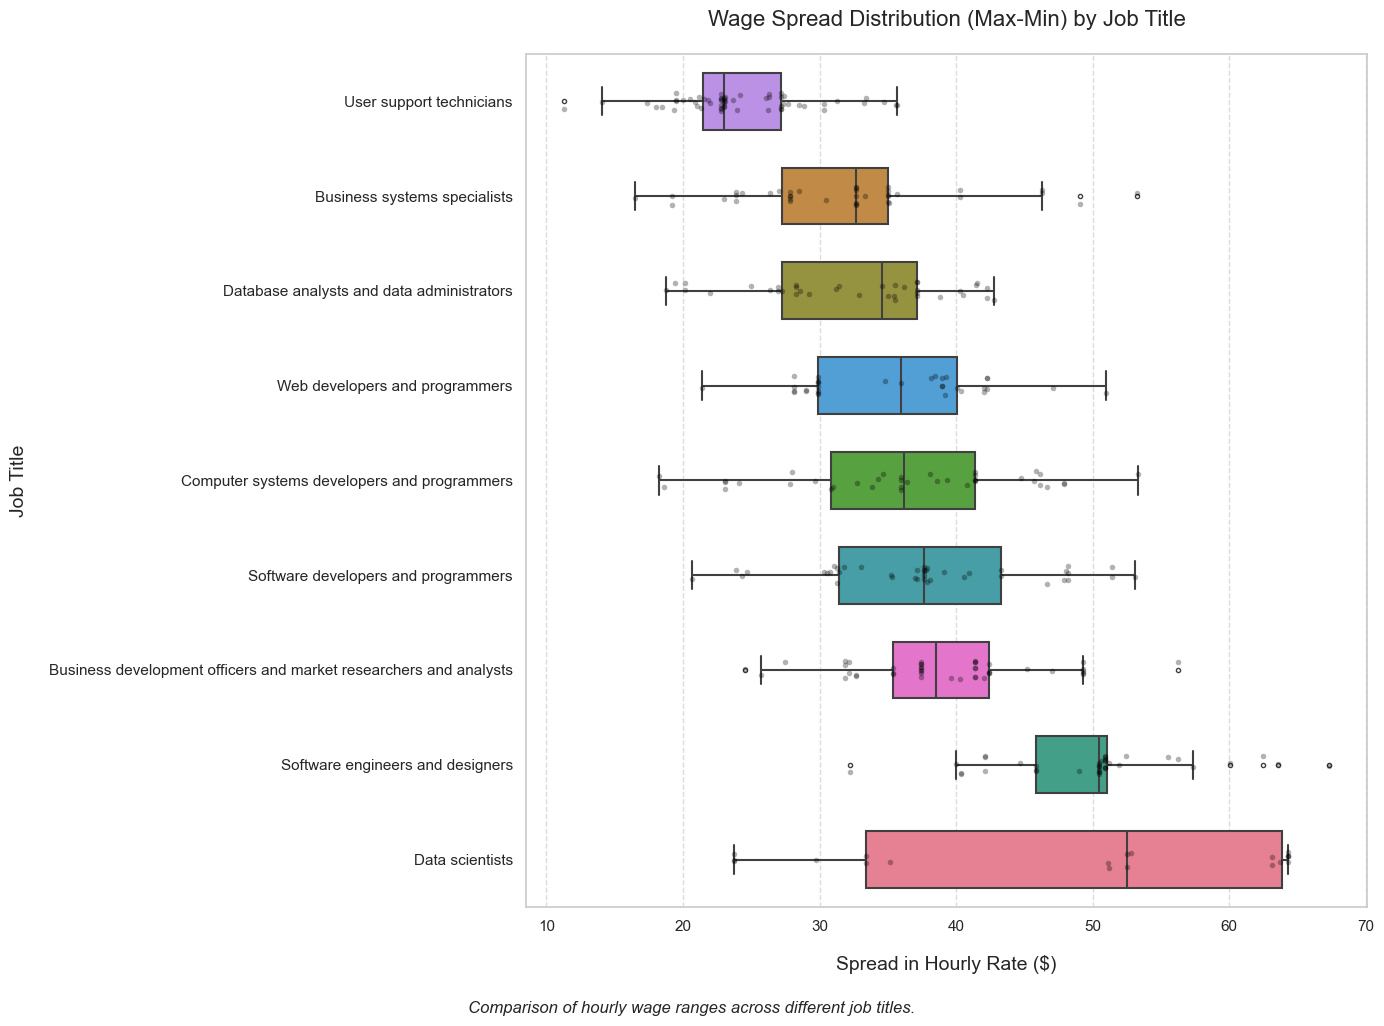

In [ ]:
plt.figure(figsize=(14, 10))

# Calculate wage spread and sort
df_renamed['Wage_Spread'] = df_renamed['Max_Wage'] - df_renamed['Min_Wage']
job_order = df_renamed.groupby('Job_Title')['Wage_Spread'].median().sort_values().index


ax = sns.boxplot(
    x='Wage_Spread', 
    y='Job_Title', 
    data=df_renamed,
    order=job_order,
    width=0.6,
    hue='Job_Title', 
    legend=False, 
    linewidth=1.5,
    fliersize=3,
    orient='h',
    palette="husl"
)

# Add a strip plot for individual data points to see distribution
sns.stripplot(
    x='Wage_Spread',
    y='Job_Title',
    data=df_renamed,
    order=job_order,
    size=4,
    color='black',
    alpha=0.3,
    jitter=True,
    orient='h'
)

plt.title('Wage Spread Distribution (Max-Min) by Job Title', fontsize=16, pad=20)
plt.xlabel('Spread in Hourly Rate ($)', fontsize=14, labelpad=15)
plt.ylabel('Job Title', fontsize=14, labelpad=15)

# Horizontal comparison
plt.grid(axis='x', linestyle='--', alpha=0.7)


# Descriptive subtitle
plt.figtext(
    0.5, 
    -0.021, 
    "Comparison of hourly wage ranges across different job titles.",
    ha='center', 
    fontsize=12, 
    style='italic'
)

plt.tight_layout()
plt.savefig('job_title_salary_comparison.png', dpi=300, bbox_inches='tight')
plt.show()